### **Installing and Importing packages**

In [ ]:
!pip install googletrans==4.0.0-rc1

     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 8.3 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=0cf80e1c47b6e19876c992f8ff18e80c806443564282d9ebe7f925a8eb54726e
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
!pip install vaderSentiment 

     |████████████████████████████████| 125 kB 4.3 MB/s 


In [ ]:
from datetime import date
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

### **Scraper**

In [ ]:
keyword = input('Enter the word:')
poresto = "https://www.poresto.net/noticias/buscar/?buscar=" + keyword
r = requests.get(poresto)
soup1 = BeautifulSoup(r.content,'html5lib')

Enter the word:cancun


In [ ]:
coverpage_news = soup1.find_all('div', {'class': 'col-xs-8'})

In [ ]:
title = []
links = []
dates = []
description = []

In [ ]:
for i in range(len(coverpage_news)):
    url_ = "https://www.poresto.net" + coverpage_news[i].find('a')['href']
    
    r = requests.get(url_)
    cover_page = r.content
    soup1 = BeautifulSoup(cover_page, 'html5lib')

    coverpagenews1 = soup1.find('div', {'class': 'fecha'})
    dates.append(coverpagenews1.get_text())
        
    description.append(coverpage_news[i].find('p').get_text())
    title.append(coverpage_news[i].find('a').get_text())
    links.append(url_)
    

In [ ]:
current_date = date.today()
current_date = current_date.strftime("%d/%m/%Y")

current_dates = [current_date for i in range(len(links))]
current_dates

['24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022',
 '24/01/2022']

In [ ]:
dict = {'Title': title, 'Link': links, 'Date': dates, 'Extracted date': current_dates, 'Description': description} 
df = pd.DataFrame(dict) 
df.to_csv('data_list_poresto.csv')

In [ ]:
poresto_news = df

In [ ]:
poresto_news

,Title,Link,Date,Extracted date,Description
0,"Durante el Semáforo Amarillo en Quintana Roo, ...",https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 08:36",24/01/2022,El Semáforo Epidemiológico Amarillo duró dos s...
1,Entra en vigor el Semáforo Naranja en los muni...,https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 08:23",24/01/2022,"A partir de este 24 de enero, todo el estado e..."
2,Carlos Joaquín calla tras balacera en el Hotel...,https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 07:57",24/01/2022,"El Gobernador de Quintana Roo, Carlos Joaquín,..."
3,Clima en Cancún: Amanecer templado con probabi...,https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 07:14",24/01/2022,El SMN pronostica que para Cancún y la Penínsu...
4,Aeropuerto de Cancún programa 520 vuelos en su...,https://www.poresto.net/quintana-roo/2022/1/23...,"\ndomingo, 23 de enero de 2022 · 15:29",24/01/2022,"En total, se registrarán 260 llegadas y 260 sa..."
5,Bañistas abarrotan las playas de Cancún a un d...,https://www.poresto.net/quintana-roo/2022/1/23...,"\ndomingo, 23 de enero de 2022 · 13:52",24/01/2022,En playa Gaviota Azul unas mil personas se enc...
6,Hombre resulta lesionado tras persecución en C...,https://www.poresto.net/poresto-policiaca/quin...,"\ndomingo, 23 de enero de 2022 · 12:02",24/01/2022,El detenido tenía heridas de bala luego de que...
7,Van de transporte turístico impacta a un autom...,https://www.poresto.net/poresto-policiaca/quin...,"\ndomingo, 23 de enero de 2022 · 10:56",24/01/2022,Una mujer resultó lesionada luego de ser impac...
8,Clima en Cancún: Frente Frío provocará fuertes...,https://www.poresto.net/quintana-roo/2022/1/23...,"\ndomingo, 23 de enero de 2022 · 05:35",24/01/2022,Para este domingo se espera cielo medio nublad...
9,Agreden a balazos a dos hombres en la Región 1...,https://www.poresto.net/poresto-policiaca/quin...,"\nsábado, 22 de enero de 2022 · 23:52",24/01/2022,Dos hombres fueron trasladados a un hospital a...


### **Translator**

In [ ]:
translator = Translator()

In [ ]:
poresto_news['Title'][0]

'Durante el Semáforo Amarillo en Quintana Roo, se registraron más de 11 mil casos'

In [ ]:
translation = translator.translate(poresto_news['Title'][0])
translation.text

'During the yellow traffic light in Quintana Roo, more than 11 thousand cases were recorded'

In [ ]:
translated_news = []
for i in range(len(poresto_news)):
    translated_news.append(translator.translate(poresto_news['Title'][i]).text)
translated_news[0]    

'During the yellow traffic light in Quintana Roo, more than 11 thousand cases were recorded'

In [ ]:
translated_desc = []
for i in range(len(poresto_news)):
  translated_desc.append(translator.translate(poresto_news['Description'][i]).text)
translated_desc[0]  

'The yellow epidemiological traffic light lasted two weeks in force at the eleven municipalities of Quintana Roo after the increase in contagions by Covid on past days, which exceeded the thousand patients'

In [ ]:
translated_dt = []
for i in range(len(poresto_news)):
  translated_dt.append(translator.translate(poresto_news['Date'][i]).text)
translated_dt[0] 

'Monday, January 24, 2022 · 08:36'

In [ ]:
poresto_news['Translated_News'] = translated_news
poresto_news['Translated_Description'] = translated_desc
poresto_news['Translated_Date'] = translated_dt
poresto_news['Sno'] = [i for i in range(1, len(translated_news)+1)]

In [ ]:
poresto_news

,Title,Link,Date,Extracted date,Description,Translated_News,Translated_Description,Translated_Date,Sno
0,"Durante el Semáforo Amarillo en Quintana Roo, ...",https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 08:36",24/01/2022,El Semáforo Epidemiológico Amarillo duró dos s...,During the yellow traffic light in Quintana Ro...,The yellow epidemiological traffic light laste...,"Monday, January 24, 2022 · 08:36",1
1,Entra en vigor el Semáforo Naranja en los muni...,https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 08:23",24/01/2022,"A partir de este 24 de enero, todo el estado e...",The orange semaphore in the municipalities of ...,"As of this January 24, the whole state enters ...","Monday, January 24, 2022 · 08:23",2
2,Carlos Joaquín calla tras balacera en el Hotel...,https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 07:57",24/01/2022,"El Gobernador de Quintana Roo, Carlos Joaquín,...",Carlos Joaquín Calla after shooting at the Xca...,"Governor of Quintana Roo, Carlos Joaquín, is l...","Monday, January 24, 2022 · 07:57",3
3,Clima en Cancún: Amanecer templado con probabi...,https://www.poresto.net/quintana-roo/2022/1/24...,"\nlunes, 24 de enero de 2022 · 07:14",24/01/2022,El SMN pronostica que para Cancún y la Penínsu...,Climate in Cancun: tempered sunrise with chanc...,The SMN predicts that for Cancun and the Yucat...,"Monday, January 24, 2022 · 07:14",4
4,Aeropuerto de Cancún programa 520 vuelos en su...,https://www.poresto.net/quintana-roo/2022/1/23...,"\ndomingo, 23 de enero de 2022 · 15:29",24/01/2022,"En total, se registrarán 260 llegadas y 260 sa...",Airport of Cancun Program 520 flights in its t...,"In total, 260 arrivals and 260 outputs will be...","Sunday, January 23, 2022 · 15:29",5
5,Bañistas abarrotan las playas de Cancún a un d...,https://www.poresto.net/quintana-roo/2022/1/23...,"\ndomingo, 23 de enero de 2022 · 13:52",24/01/2022,En playa Gaviota Azul unas mil personas se enc...,Bathers crowd the beaches of Cancun a day from...,On Beach Seagull Blue A thousand people are en...,"Sunday, January 23, 2022 · 13:52",6
6,Hombre resulta lesionado tras persecución en C...,https://www.poresto.net/poresto-policiaca/quin...,"\ndomingo, 23 de enero de 2022 · 12:02",24/01/2022,El detenido tenía heridas de bala luego de que...,Man is injured after persecution in Cancun;He ...,The detainee had bullet wounds after he and hi...,"Sunday, January 23, 2022 · 12:02",7
7,Van de transporte turístico impacta a un autom...,https://www.poresto.net/poresto-policiaca/quin...,"\ndomingo, 23 de enero de 2022 · 10:56",24/01/2022,Una mujer resultó lesionada luego de ser impac...,Van of tourist transport impacts a car in Canc...,A woman was injured after being impacted by a ...,"Sunday, January 23, 2022 · 10:56",8
8,Clima en Cancún: Frente Frío provocará fuertes...,https://www.poresto.net/quintana-roo/2022/1/23...,"\ndomingo, 23 de enero de 2022 · 05:35",24/01/2022,Para este domingo se espera cielo medio nublad...,Climate in Cancun: cold front will cause heavy...,"For this Sunday, half cloudy sky is expected t...","Sunday, January 23, 2022 · 05:35",9
9,Agreden a balazos a dos hombres en la Región 1...,https://www.poresto.net/poresto-policiaca/quin...,"\nsábado, 22 de enero de 2022 · 23:52",24/01/2022,Dos hombres fueron trasladados a un hospital a...,Two men attack in the region 100 of Cancun,Two men were transferred to a hospital aboard ...,"Saturday, January 22, 2022 · 23:52",10


In [ ]:
poresto_news.to_csv('Poresto.csv')

### **Sentiment Analysis**

In [ ]:
def sentiment_scores(sentence):
  sid_obj = SentimentIntensityAnalyzer()
 
  sentiment_dict = sid_obj.polarity_scores(sentence)
     
  #print("Overall sentiment dictionary is : ", sentiment_dict)
  #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
  #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
  #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

  #print("Sentence Overall Rated As", end = " ")

  # decide sentiment as positive, negative and neutral
  if sentiment_dict['compound'] >= 0.05 :
      #print("Positive")
      return "Positive"

  elif sentiment_dict['compound'] <= - 0.05 :
      #print("Negative")
      return "Negative"

  else :
      #print("Neutral")
      return "Neutral"

In [ ]:
final1 = []

for i in poresto_news['Sno']:
    final1.append(sentiment_scores(poresto_news['Translated_News'][i-1]))
    

In [ ]:
m1 = Counter(final1)
m1

Counter({'Negative': 9, 'Neutral': 9, 'Positive': 2})

<BarContainer object of 3 artists>

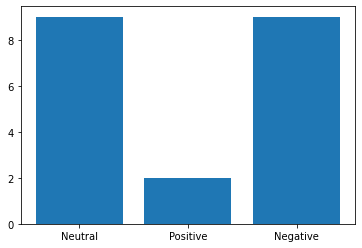

In [ ]:
keys1 = m1.keys()
values1 = m1.values()

plt.bar(keys1, values1)

In [ ]:
final2 = []

for i in poresto_news['Sno']:
    final2.append(sentiment_scores(poresto_news['Translated_Description'][i-1]))
    

In [ ]:
m2 = Counter(final2)
m2

Counter({'Negative': 7, 'Neutral': 7, 'Positive': 6})

<BarContainer object of 3 artists>

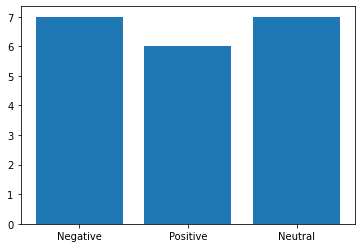

In [ ]:
keys2 = m2.keys()
values2 = m2.values()

plt.bar(keys2, values2)